In [14]:
import json 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def moving_average(x, w):
    start = np.cumsum(x[:w-1])/np.arange(1,w)
    middle = np.convolve(x, np.ones(w), 'valid') / w
    return np.concatenate((start, middle), axis=0) 

def print_curve(path):
    sns.set_theme()

    with open(path, 'r') as f:
        data = json.load(f)
        
    train_loss = data['train_loss']
    train_acc = data['train_acc']

    x = np.arange(1, len(train_loss)+1)
    train_loss_np = moving_average(train_loss, 200)
    train_acc_np = moving_average(train_acc, 200)

    avg_min_loss = min(moving_average(train_loss, 3000))
    avg_max_acc = max(moving_average(train_acc, 3000))


    plt.plot(x, train_loss_np)
    plt.plot(x, train_acc_np)
    plt.axhline(y=avg_min_loss, color='r')
    plt.axhline(y=avg_max_acc, color='g')

def get_exp_path(name, base='shf'):
    if base == 'shf':
        path = f'/home/alta/Conversational/OET/al826/2021/coherence/results/synthetic/{name}/train_curves.json'
    elif base == 'rnd':
        path = f'/home/alta/Conversational/OET/al826/2021/coherence/results/synthetic_swp1/{name}/train_curves.json'
    elif name == 'tmp':
        path = f'/home/alta/Conversational/OET/al826/2021/coherence/results/temp/train_curves.json'
    return path 

(0.0, 125000.0)

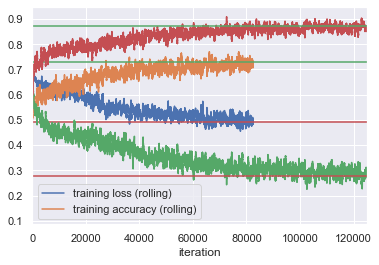

In [16]:
exp_name = 'glove_rank_long'
exp_name_2 = 'glove_wiki_rank_loss'
exp_path = get_exp_path(exp_name, base='rnd')
exp_path_2 = get_exp_path(exp_name_2)

print_curve(exp_path)
print_curve(exp_path_2)

plt.xlabel('iteration')
plt.legend(['training loss (rolling)', 'training accuracy (rolling)'])
plt.xlim(0,125_000)

In [3]:
exp_name = 'glove_wiki_rank_loss'
exp_dir = f'/home/alta/Conversational/OET/al826/2021/coherence/results/synthetic/{exp_name}'
temp_dir = f'/home/alta/Conversational/OET/al826/2021/coherence/results/temp'

log_path = f'{exp_dir}/train_curves.json'


#plt.xlim(0,75000)
#plt.plot(x_train, train_loss_dotted, '--')
#plt.plot(x_train, train_acc_dotted, '--')
